In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
pd.set_option('display.max_columns', 500)
df_county_facts = pd.read_csv('../data/count.csv')
df_dictionary = pd.read_csv('../data/dictionary.csv')
df_county_facts.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,SEX255214,RHI125214,RHI225214,RHI325214,RHI425214,RHI525214,RHI625214,RHI725214,RHI825214,POP715213,POP645213,POP815213,EDU635213,EDU685213,VET605213,LFE305213,HSG010214,HSG445213,HSG096213,HSG495213,HSD410213,HSD310213,INC910213,INC110213,PVY020213,BZA010213,BZA110213,BZA115213,NES010213,SBO001207,SBO315207,SBO115207,SBO215207,SBO515207,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,50.8,77.4,13.2,1.2,5.4,0.2,2.5,17.4,62.1,84.9,12.9,20.7,86.0,28.8,21263779,25.5,133957180,64.9,26.0,176700,115610216,2.63,28155,53046,15.4,7488353,118266253,2.0,23005620,27092908,7.1,0.9,5.7,0.1,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,51.5,69.7,26.7,0.7,1.3,0.1,1.5,4.1,66.2,85.0,3.5,5.2,83.1,22.6,388865,24.2,2207912,69.7,15.9,122500,1838683,2.55,23680,43253,18.6,97578,1603100,1.1,311578,382350,14.8,0.8,1.8,0.1,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,51.4,77.9,18.7,0.5,1.1,0.1,1.8,2.7,75.6,85.0,1.6,3.5,85.6,20.9,5922,26.2,22751,76.8,8.3,136200,20071,2.71,24571,53682,12.1,817,10120,2.1,2947,4067,15.2,0.0,1.3,0.0,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,51.2,87.1,9.6,0.7,0.9,0.1,1.6,4.6,83.0,82.1,3.6,5.5,89.1,27.7,19346,25.9,107374,72.6,24.4,168600,73283,2.52,26766,50221,13.9,4871,54988,3.7,16508,19035,2.7,0.4,1.0,0.0,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,46.6,50.2,47.6,0.6,0.5,0.2,0.9,4.5,46.6,84.8,2.9,5.0,73.7,13.4,2120,24.6,11799,67.7,10.6,89200,9200,2.66,16829,32911,26.7,464,6611,-5.6,1546,1667,0.0,0.0,0.0,0.0,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


Looks like the dictionary data set is pretty comprehensive. There are a lot of features that seem like they will can be useful, but it will be important to figure out which features carry the most weight in the predictive models I create. 

In [30]:
print(df_dictionary)

   column_name                                        description
0    PST045214                          Population, 2014 estimate
1    PST040210          Population, 2010 (April 1) estimates base
2    PST120214  Population, percent change - April 1, 2010 to ...
3    POP010210                                   Population, 2010
4    AGE135214               Persons under 5 years, percent, 2014
5    AGE295214              Persons under 18 years, percent, 2014
6    AGE775214           Persons 65 years and over, percent, 2014
7    SEX255214                      Female persons, percent, 2014
8    RHI125214                         White alone, percent, 2014
9    RHI225214     Black or African American alone, percent, 2014
10   RHI325214  American Indian and Alaska Native alone, perce...
11   RHI425214                         Asian alone, percent, 2014
12   RHI525214  Native Hawaiian and Other Pacific Islander alo...
13   RHI625214                   Two or More Races, percent, 2014
14   RHI72

Woah, there's a lot of cool data here! I'll want to see which features will work the best with each other, and also to see if they had any sort of impact on a particular county being flipped.

In [31]:
df_votes = pd.read_csv('../data/votes.csv')
df_votes.head(10)

,Unnamed: 0,X,combined_fips,votes_dem_2016,votes_gop_2016,total_votes_2016,Clinton,Trump,diff_2016,per_point_diff_2016,state_abbr,county_name,FIPS,total_votes_2012,votes_dem_2012,votes_gop_2012,county_fips,state_fips,Obama,Romney,diff_2012,per_point_diff_2012,fips,area_name,state_abbreviation,population2014,population2010,population_change,POP010210,AGE135214,AGE295214,age65plus,SEX255214,White,Black,RHI325214,RHI425214,RHI525214,RHI625214,Hispanic,RHI825214,POP715213,POP645213,NonEnglish,Edu_highschool,Edu_batchelors,VET605213,LFE305213,HSG010214,HSG445213,HSG096213,HSG495213,HSD410213,HSD310213,Income,INC110213,Poverty,BZA010213,BZA110213,BZA115213,NES010213,SBO001207,SBO315207,SBO115207,SBO215207,SBO515207,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,Density,Clinton_Obama,Trump_Romney,Trump_Prediction,Clinton_Prediction,Trump_Deviation,Clinton_Deviation
0,30,29,1001,5908,18110,24661,0.239569,0.734358,12202,-0.494789,AL,Autauga County,1001,23909,6354,17366,1001,1,0.265758,0.726337,11012,-0.460580,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,51.4,0.779,0.187,0.5,1.1,0.1,1.8,0.027,75.6,85.0,1.6,3.5,85.6,20.9,5922,26.2,22751,76.8,8.3,136200,20071,2.71,24571,53682,12.1,817,10120,2.1,2947,4067,15.2,0.0,1.3,0.0,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8,-0.026189,0.008021,0.620859,0.340493,-0.113499,0.100924
1,31,30,1003,18409,72780,94090,0.195653,0.773515,54371,-0.577862,AL,Baldwin County,1003,84988,18329,65772,1003,1,0.215666,0.773897,47443,-0.558232,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,51.2,0.871,0.096,0.7,0.9,0.1,1.6,0.046,83.0,82.1,3.6,5.5,89.1,27.7,19346,25.9,107374,72.6,24.4,168600,73283,2.52,26766,50221,13.9,4871,54988,3.7,16508,19035,2.7,0.4,1.0,0.0,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6,-0.020013,-0.000383,0.586749,0.359502,-0.186766,0.163849
2,32,31,1005,4848,5431,10390,0.466603,0.522714,583,-0.056112,AL,Barbour County,1005,11459,5873,5539,1005,1,0.512523,0.483376,334,0.029147,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,46.6,0.502,0.476,0.6,0.5,0.2,0.9,0.045,46.6,84.8,2.9,5.0,73.7,13.4,2120,24.6,11799,67.7,10.6,89200,9200,2.66,16829,32911,26.7,464,6611,-5.6,1546,1667,0.0,0.0,0.0,0.0,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0,-0.045920,0.039339,0.517832,0.474693,-0.004882,0.008090
3,33,32,1007,1874,6733,8748,0.214220,0.769662,4859,-0.555441,AL,Bibb County,1007,8391,2200,6131,1007,1,0.262186,0.730664,3931,-0.468478,1007,Bibb County,AL,22506,22919,-1.8,22915,5.3,21.0,14.8,45.9,0.763,0.221,0.4,0.2,0.1,0.9,0.021,74.5,86.6,1.2,2.1,77.5,12.1,1327,27.6,8978,79.0,7.3,90500,7091,3.03,17427,36447,18.1,275,3145,7.5,1126,1385,14.9,0.0,0.0,0.0,0.0,0.0,0,0,124707,5804,10757,19,622.58,36.8,-0.047965,0.038998,0.692227,0.286031,-0.077434,0.071811
4,34,33,1009,2150,22808,25384,0.084699,0.898519,20658,-0.813820,AL,Blount County,1009,23980,2961,20741,1009,1,0.123478,0.864929,17780,-0.741451,1009,Blount County,AL,57719,57322,0.7,57322,6.1,23.6,17.0,50.5,0.960,0.018,0.6,0.3,0.1,1.2,0.087,87.8,88.7,4.3,7.3,77.0,12.1,4540,33.9,23826,81.0,4.5,117100,21108,2.70,20730,44145,15.8,660,6798,3.4,3563,4458,0.0,0.0,0.0,0.0,0.0,23.2,341544,0,319700,5622,20941,3,644.78,88.9,-0.038779,0.033590,0.789649,0.177490,-0.108870,0.092791
5,35,34,1011,3530,1139,4701,0.750904,0.242289,2391,0.508615,AL,Bullock County,1011,5318,4058,1250,1011,1,0.763069,0.235051,2808,0.528018,1011,Bullock County,AL,10764,10915,-1.4,10914,6.3,21.4,14.9,45.3,0.269,0.701,0.8,0.3,0.7,1.1,0.075,22.1,84.7,5.4,5.2,67.8,12.5,636,26.9,4461,74.3,8.7,70600,3741,2.73,18628,32033,21.6,112,0,0.0,470,417,0.0,0.0,0.0,0.0,0.0,38.8,0,0,43810,3995,3670,1,622.81,17.5,-0.012165,0.007238,0.445269,0.572216,0.202980,-0.178688
6,36,35,1013,3716,4891,8685,0.427864,0.563155,1175,-0.135291,AL,Butler County,1013,9483,4367,5081,1013,1,0.460508,0.535801,714,-0.075293,1013,Butler County,AL,20296,20946,-3.1,20947,6.1,23.6,18.0,53.6,0.539,0.440,0.4,0.9,0.0,0.8,0.012,53.1,94.6,0.8,1.7,76.3,14.0,149

Going to do some light feature engineering here to add new columns for the winnners of both the
    -2016 election
    -2012 election

In [32]:
#adding new columns
#for row in (df_votes):
    #df_votes
for i,row in enumerate(df_votes.iterrows()):
    if row[1].votes_gop_2016>row[1].votes_dem_2016:
        df_votes.loc[i,'W16'] = 'Trump'
    else:
        df_votes.loc[i,'W16'] = 'Clinton'  
    if row[1].votes_gop_2012>row[1].votes_dem_2012:
        df_votes.loc[i,'W12'] = 'Romney'
    else:
        df_votes.loc[i,'W12'] = 'Obama' 
        
df_votes.head(10)

,Unnamed: 0,X,combined_fips,votes_dem_2016,votes_gop_2016,total_votes_2016,Clinton,Trump,diff_2016,per_point_diff_2016,state_abbr,county_name,FIPS,total_votes_2012,votes_dem_2012,votes_gop_2012,county_fips,state_fips,Obama,Romney,diff_2012,per_point_diff_2012,fips,area_name,state_abbreviation,population2014,population2010,population_change,POP010210,AGE135214,AGE295214,age65plus,SEX255214,White,Black,RHI325214,RHI425214,RHI525214,RHI625214,Hispanic,RHI825214,POP715213,POP645213,NonEnglish,Edu_highschool,Edu_batchelors,VET605213,LFE305213,HSG010214,HSG445213,HSG096213,HSG495213,HSD410213,HSD310213,Income,INC110213,Poverty,BZA010213,BZA110213,BZA115213,NES010213,SBO001207,SBO315207,SBO115207,SBO215207,SBO515207,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,Density,Clinton_Obama,Trump_Romney,Trump_Prediction,Clinton_Prediction,Trump_Deviation,Clinton_Deviation,W16,W12
0,30,29,1001,5908,18110,24661,0.239569,0.734358,12202,-0.494789,AL,Autauga County,1001,23909,6354,17366,1001,1,0.265758,0.726337,11012,-0.460580,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,51.4,0.779,0.187,0.5,1.1,0.1,1.8,0.027,75.6,85.0,1.6,3.5,85.6,20.9,5922,26.2,22751,76.8,8.3,136200,20071,2.71,24571,53682,12.1,817,10120,2.1,2947,4067,15.2,0.0,1.3,0.0,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8,-0.026189,0.008021,0.620859,0.340493,-0.113499,0.100924,Trump,Romney
1,31,30,1003,18409,72780,94090,0.195653,0.773515,54371,-0.577862,AL,Baldwin County,1003,84988,18329,65772,1003,1,0.215666,0.773897,47443,-0.558232,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,51.2,0.871,0.096,0.7,0.9,0.1,1.6,0.046,83.0,82.1,3.6,5.5,89.1,27.7,19346,25.9,107374,72.6,24.4,168600,73283,2.52,26766,50221,13.9,4871,54988,3.7,16508,19035,2.7,0.4,1.0,0.0,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6,-0.020013,-0.000383,0.586749,0.359502,-0.186766,0.163849,Trump,Romney
2,32,31,1005,4848,5431,10390,0.466603,0.522714,583,-0.056112,AL,Barbour County,1005,11459,5873,5539,1005,1,0.512523,0.483376,334,0.029147,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,46.6,0.502,0.476,0.6,0.5,0.2,0.9,0.045,46.6,84.8,2.9,5.0,73.7,13.4,2120,24.6,11799,67.7,10.6,89200,9200,2.66,16829,32911,26.7,464,6611,-5.6,1546,1667,0.0,0.0,0.0,0.0,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0,-0.045920,0.039339,0.517832,0.474693,-0.004882,0.008090,Trump,Obama
3,33,32,1007,1874,6733,8748,0.214220,0.769662,4859,-0.555441,AL,Bibb County,1007,8391,2200,6131,1007,1,0.262186,0.730664,3931,-0.468478,1007,Bibb County,AL,22506,22919,-1.8,22915,5.3,21.0,14.8,45.9,0.763,0.221,0.4,0.2,0.1,0.9,0.021,74.5,86.6,1.2,2.1,77.5,12.1,1327,27.6,8978,79.0,7.3,90500,7091,3.03,17427,36447,18.1,275,3145,7.5,1126,1385,14.9,0.0,0.0,0.0,0.0,0.0,0,0,124707,5804,10757,19,622.58,36.8,-0.047965,0.038998,0.692227,0.286031,-0.077434,0.071811,Trump,Romney
4,34,33,1009,2150,22808,25384,0.084699,0.898519,20658,-0.813820,AL,Blount County,1009,23980,2961,20741,1009,1,0.123478,0.864929,17780,-0.741451,1009,Blount County,AL,57719,57322,0.7,57322,6.1,23.6,17.0,50.5,0.960,0.018,0.6,0.3,0.1,1.2,0.087,87.8,88.7,4.3,7.3,77.0,12.1,4540,33.9,23826,81.0,4.5,117100,21108,2.70,20730,44145,15.8,660,6798,3.4,3563,4458,0.0,0.0,0.0,0.0,0.0,23.2,341544,0,319700,5622,20941,3,644.78,88.9,-0.038779,0.033590,0.789649,0.177490,-0.108870,0.092791,Trump,Romney
5,35,34,1011,3530,1139,4701,0.750904,0.242289,2391,0.508615,AL,Bullock County,1011,5318,4058,1250,1011,1,0.763069,0.235051,2808,0.528018,1011,Bullock County,AL,10764,10915,-1.4,10914,6.3,21.4,14.9,45.3,0.269,0.701,0.8,0.3,0.7,1.1,0.075,22.1,84.7,5.4,5.2,67.8,12.5,636,26.9,4461,74.3,8.7,70600,3741,2.73,18628,32033,21.6,112,0,0.0,470,417,0.0,0.0,0.0,0.0,0.0,38.8,0,0,43810,3995,3670,1,622.81,17.5,-0.012165,0.007238,0.445269,0.572216,0.202980,-0.178688,Clinton,Obama
6,36,35,1013,3716,4891,8685,0.427864,0.563155,1175,-0.135291,AL,Butler County,1013,9483,4367,5081,1013,1,0.460508,0.535801,714,-0.075293,1013,Butler County,AL,20296,20946,-3.1,2094

Some more feature engineering here to label encode the columns that were (successfully) created for the winners of 2012 and 2016 election. First of all, it cannot be strings. So we'll use a label encoder and it should turn it into a binary outcome of 0s and 1s. 

In [33]:
from sklearn.preprocessing import LabelEncoder
#not sure if I'll need to label encode any other features, but only these two for now is fine. 
le = LabelEncoder()
le.fit(df_votes['W16'])
df_votes['W16'] = le.transform(df_votes['W16'])
le.fit(df_votes['W12'])
df_votes['W12'] = le.transform(df_votes['W12'])

df_votes.head(10)

,Unnamed: 0,X,combined_fips,votes_dem_2016,votes_gop_2016,total_votes_2016,Clinton,Trump,diff_2016,per_point_diff_2016,state_abbr,county_name,FIPS,total_votes_2012,votes_dem_2012,votes_gop_2012,county_fips,state_fips,Obama,Romney,diff_2012,per_point_diff_2012,fips,area_name,state_abbreviation,population2014,population2010,population_change,POP010210,AGE135214,AGE295214,age65plus,SEX255214,White,Black,RHI325214,RHI425214,RHI525214,RHI625214,Hispanic,RHI825214,POP715213,POP645213,NonEnglish,Edu_highschool,Edu_batchelors,VET605213,LFE305213,HSG010214,HSG445213,HSG096213,HSG495213,HSD410213,HSD310213,Income,INC110213,Poverty,BZA010213,BZA110213,BZA115213,NES010213,SBO001207,SBO315207,SBO115207,SBO215207,SBO515207,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,Density,Clinton_Obama,Trump_Romney,Trump_Prediction,Clinton_Prediction,Trump_Deviation,Clinton_Deviation,W16,W12
0,30,29,1001,5908,18110,24661,0.239569,0.734358,12202,-0.494789,AL,Autauga County,1001,23909,6354,17366,1001,1,0.265758,0.726337,11012,-0.460580,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,51.4,0.779,0.187,0.5,1.1,0.1,1.8,0.027,75.6,85.0,1.6,3.5,85.6,20.9,5922,26.2,22751,76.8,8.3,136200,20071,2.71,24571,53682,12.1,817,10120,2.1,2947,4067,15.2,0.0,1.3,0.0,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8,-0.026189,0.008021,0.620859,0.340493,-0.113499,0.100924,1,1
1,31,30,1003,18409,72780,94090,0.195653,0.773515,54371,-0.577862,AL,Baldwin County,1003,84988,18329,65772,1003,1,0.215666,0.773897,47443,-0.558232,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,51.2,0.871,0.096,0.7,0.9,0.1,1.6,0.046,83.0,82.1,3.6,5.5,89.1,27.7,19346,25.9,107374,72.6,24.4,168600,73283,2.52,26766,50221,13.9,4871,54988,3.7,16508,19035,2.7,0.4,1.0,0.0,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6,-0.020013,-0.000383,0.586749,0.359502,-0.186766,0.163849,1,1
2,32,31,1005,4848,5431,10390,0.466603,0.522714,583,-0.056112,AL,Barbour County,1005,11459,5873,5539,1005,1,0.512523,0.483376,334,0.029147,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,46.6,0.502,0.476,0.6,0.5,0.2,0.9,0.045,46.6,84.8,2.9,5.0,73.7,13.4,2120,24.6,11799,67.7,10.6,89200,9200,2.66,16829,32911,26.7,464,6611,-5.6,1546,1667,0.0,0.0,0.0,0.0,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0,-0.045920,0.039339,0.517832,0.474693,-0.004882,0.008090,1,0
3,33,32,1007,1874,6733,8748,0.214220,0.769662,4859,-0.555441,AL,Bibb County,1007,8391,2200,6131,1007,1,0.262186,0.730664,3931,-0.468478,1007,Bibb County,AL,22506,22919,-1.8,22915,5.3,21.0,14.8,45.9,0.763,0.221,0.4,0.2,0.1,0.9,0.021,74.5,86.6,1.2,2.1,77.5,12.1,1327,27.6,8978,79.0,7.3,90500,7091,3.03,17427,36447,18.1,275,3145,7.5,1126,1385,14.9,0.0,0.0,0.0,0.0,0.0,0,0,124707,5804,10757,19,622.58,36.8,-0.047965,0.038998,0.692227,0.286031,-0.077434,0.071811,1,1
4,34,33,1009,2150,22808,25384,0.084699,0.898519,20658,-0.813820,AL,Blount County,1009,23980,2961,20741,1009,1,0.123478,0.864929,17780,-0.741451,1009,Blount County,AL,57719,57322,0.7,57322,6.1,23.6,17.0,50.5,0.960,0.018,0.6,0.3,0.1,1.2,0.087,87.8,88.7,4.3,7.3,77.0,12.1,4540,33.9,23826,81.0,4.5,117100,21108,2.70,20730,44145,15.8,660,6798,3.4,3563,4458,0.0,0.0,0.0,0.0,0.0,23.2,341544,0,319700,5622,20941,3,644.78,88.9,-0.038779,0.033590,0.789649,0.177490,-0.108870,0.092791,1,1
5,35,34,1011,3530,1139,4701,0.750904,0.242289,2391,0.508615,AL,Bullock County,1011,5318,4058,1250,1011,1,0.763069,0.235051,2808,0.528018,1011,Bullock County,AL,10764,10915,-1.4,10914,6.3,21.4,14.9,45.3,0.269,0.701,0.8,0.3,0.7,1.1,0.075,22.1,84.7,5.4,5.2,67.8,12.5,636,26.9,4461,74.3,8.7,70600,3741,2.73,18628,32033,21.6,112,0,0.0,470,417,0.0,0.0,0.0,0.0,0.0,38.8,0,0,43810,3995,3670,1,622.81,17.5,-0.012165,0.007238,0.445269,0.572216,0.202980,-0.178688,0,0
6,36,35,1013,3716,4891,8685,0.427864,0.563155,1175,-0.135291,AL,Butler County,1013,9483,4367,5081,1013,1,0.460508,0.535801,714,-0.075293,1013,Butler County,AL,20296,20946,-3.1,20947,6.1,23.6,18.0,53.6,0.539,0.440,0.4,0.9,0.0,0.8,0.012

2016 Winners:
    0 = Clinton
    
    1 = Trump
    
2012 Winners:
    0 = Obama
    
    1 = Romney

In [34]:
df_votes.dtypes
#For some reason the label encoder changed the columns to ones and zeros except the type of
#the columns is still object not numberic, so let's fix that. 
df_votes["W12"] = pd.to_numeric(df_votes["W12"])
df_votes["W16"] = pd.to_numeric(df_votes["W16"])

In [35]:
df_votes.dtypes

Unnamed: 0               int64
X                        int64
combined_fips            int64
votes_dem_2016           int64
votes_gop_2016           int64
total_votes_2016         int64
Clinton                float64
Trump                  float64
diff_2016                int64
per_point_diff_2016    float64
state_abbr              object
county_name             object
FIPS                     int64
total_votes_2012         int64
votes_dem_2012           int64
votes_gop_2012           int64
county_fips              int64
state_fips               int64
Obama                  float64
Romney                 float64
diff_2012                int64
per_point_diff_2012    float64
fips                     int64
area_name               object
state_abbreviation      object
population2014           int64
population2010           int64
population_change      float64
POP010210                int64
AGE135214              float64
                        ...   
Income                   int64
INC11021

Works! Now let's visualize the 16Winner and 12Winner columns. 

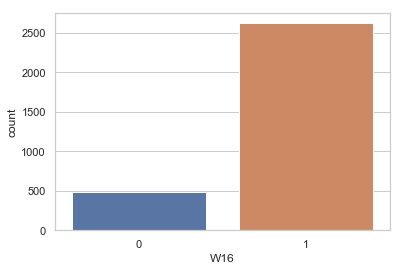

In [37]:
sns.set(style="whitegrid")
ax = sns.countplot(x="W16", data=df_votes)

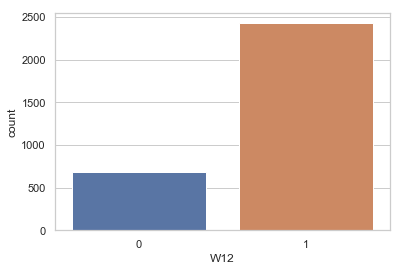

In [39]:
ax = sns.countplot(x="W12", data=df_votes)

Now I'll work on a predictive model. In the past projects I often used a random forest classifier for this because it works well when there are a lot of features. I would like to see what combination of features give the best prediction accuracy score.

The previous notebook utilized these features so I'll start with the same ones that way we can potentially compare those results. 
edu-bachelors,
white,
black,
hispanic,
12winner

Unfortunately, 'edu-bachelors' is spelled wrong in the entire dataset.

In [45]:
from sklearn.model_selection import train_test_split
labels = df_votes['W16']
features = df_votes[['W12']]
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    labels, 
                                                    test_size=0.20, 
                                                    random_state=42)


In [46]:
from sklearn.ensemble import RandomForestClassifier
#creating a random forest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
#Predicting the label of the new data set
prediction = model.predict(X_test)
print (prediction)

[1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 1 1
 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 0
 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1
 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0
 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0
 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0
 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1
 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1
 0 1 1 1 1 1 1 0 1 1 1 1 

In [47]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction,))

0.9229534510433387


Looks like 12Winner seems to be a great indicator of predicting the election outcome for each county in 2016. This makes a lot of sense, seeing that not many counties flip every four years. That leads to the next point of exploration: what counties did flip? And how many were there per state.

Also want to look more into combining features as the inputs to the random forest classifier. Let's try adding more input features. 

In [95]:
labels = df_votes['W16']
features = df_votes[['White', 'Black', 'Hispanic', 'Edu_batchelors']]
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    labels, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [96]:
#creating a random forest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
#Predicting the label of the new data set
prediction = model.predict(X_test)
#print (prediction)

In [97]:
print(accuracy_score(y_test, prediction,))

0.9036918138041734


Turned out pretty well, I'll take a 96% accuracy. Now let's do some work to try and visualize flipped counties. First, looks like we'll need to create a subset of the dataset with counties that went from  
    -Obama12 => Trump16
    -Romney12 => Clinton16
First, let's look at counties that went from being democratic in 2012 to being republican in 2016. 

In [81]:
flipCountiesDemtoRep = df_votes[df_votes.W16 == 1]
flipCountiesDemtoRep = flipCountiesDemtoRep[flipCountiesDemtoRep.W12 == 0]

Text(0,0.5,'TOTAL # OF FLIPPED COUNTIES')

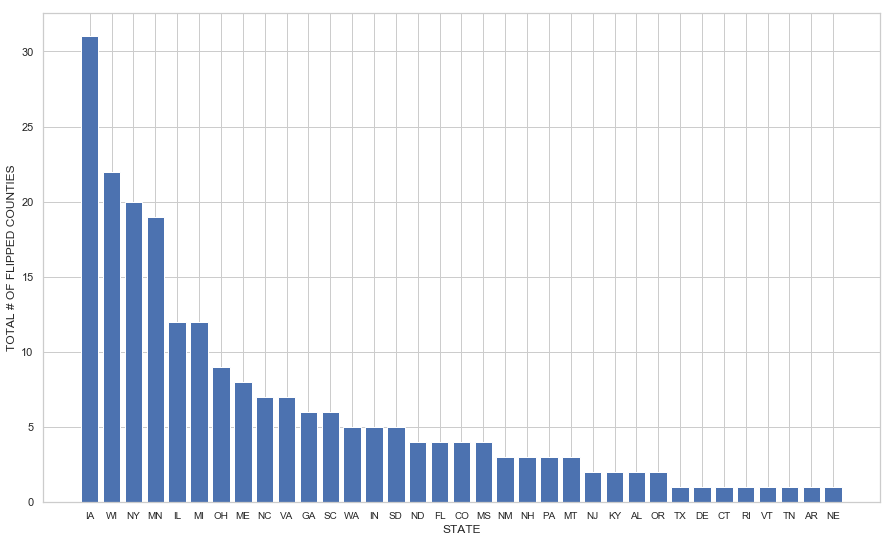

In [99]:

temp = flipCountiesDemtoRep['state_abbr'].value_counts().index.tolist()
st = flipCountiesDemtoRep['state_abbr'].value_counts()

plt.figure(figsize = (15,9))
plt.bar(range(len(st)),st)
#barplot.set_color('r')
plt.xticks(range(len(temp)), temp, size='small')
plt.xlabel('STATE')
plt.ylabel('TOTAL # OF FLIPPED COUNTIES')


In [88]:
x = len(temp)
print(x)

35


Alright now we'll do the same process for looking at the flip from a Republican county in 2012 to a Democratic county in 2016. 

In [90]:
flipCountiesReptoDem = df_votes[df_votes.W16 == 0]
flipCountiesReptoDem = flipCountiesReptoDem[flipCountiesReptoDem.W12 == 1]

Text(0,0.5,'TOTAL # OF FLIPPED COUNTIES')

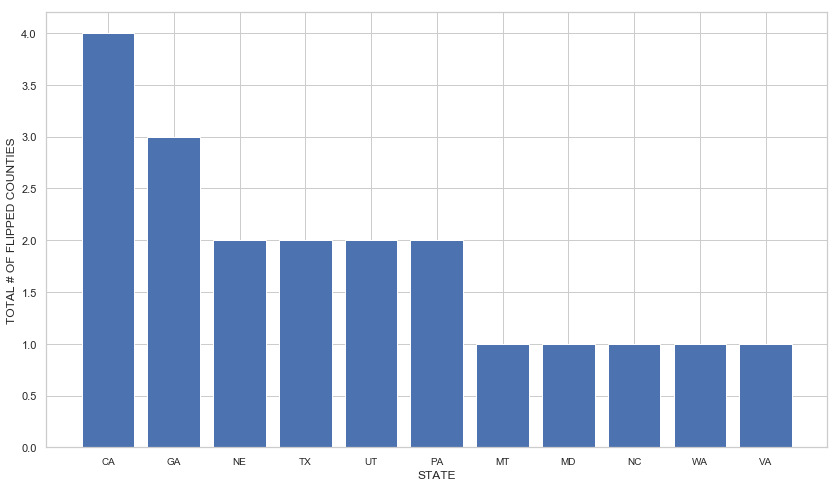

In [104]:
temp = flipCountiesReptoDem['state_abbr'].value_counts().index.tolist()
st = flipCountiesReptoDem['state_abbr'].value_counts()

plt.figure(figsize = (14,8))
plt.bar(range(len(st)),st)
#barplot.set_color('r')
plt.xticks(range(len(temp)), temp, size='small')
plt.xlabel('STATE')
plt.ylabel('TOTAL # OF FLIPPED COUNTIES')

In [94]:
y = len(temp)
print(y)

11


Very interesting. Republican counties that flipped to being Democratic are at a max of 4 (in California) where as the max for Democratic to Republican is above 30. Also, there are 35 states that have counties that flipped from Democratic to Republican whereas only 11 states had counties that flipped from being Republican to Democratic. 70% for Democrat to Republican and 22% for the other way around. 

This is a great point to do some reasearch on. For the future, I think a good way to further explore this data would be to figure out what factors contributed to counties flipping one way or the other and why there were so many more democratic to republican flips. 

In [93]:
#total =  df_votes['state_abbr'].value_counts()
#print(total.count())